## **Word level one hot encoding**

In [1]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework'] #Intial data: one entry per sample 
token_index = {} #Builds an index of all tokens in the data
for sample in samples:
  for word in sample.split(): #Tokenize the sample via the split method. This strip can also be done with punctuation and special characters.
    if word not in token_index:
      token_index[word] = len(token_index)+1 #Assigns a unique index to each unique words except 0.
max_length = 10 #For vectorizing the sample we are only considering the first max_length word in each sample.
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1)) #This is where we store the results
for i,sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## **Character level one hot encoding**

In [2]:
import string
samples = ['The cat sat on the mat', 'The dog ate my homework']
characters = string.printable #All printable ASCII characters
token_index = dict(zip(range(1, len(characters)+1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys())+1))
for i, sample in enumerate(samples):
  for j,character in enumerate(sample):
    index  = token_index.get(character)
    results[i,j,index] = 1
print(results)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]




> **Note:** Keras has built-in utilities for doing one-hot encoding of the text at the word level or character level, strating from raw text data. You should use these utilities, because they take care of a number of important features such as stripping special characters from strings and onlt taken into account the N most common words in our dataset (It is a common  restriction to avoid dealing with very large input vector spaces).



## **Using Keras for word level one-hot encoding**

In [3]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000) #Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer.fit_on_texts(samples) #Builds the word index

sequences = tokenizer.texts_to_sequences(samples) #Turn strings into lists of integer indices
one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary') #directly get the one-hot binary representations

word_index = tokenizer.word_index #recover the word index that was computed
print('Found %s unique tokens.' % len(word_index), word_index)

Found 9 unique tokens. {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


## **One-hot encoding with hashing trick**

In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i,sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality #Hashes the word into a random integer index between 0 and 1000
    results[i,j,index] =1
    print(results[i,:,:],index)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 865
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 755
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 288
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 943
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 579
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 40
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0

## **Instantiating an Embedding Layer**
It works as a dictionary look up that maps integer indices (stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors.

The embedding layer takes a 2D tensor of integers, of shape = `(samples, sequence length)` where each entry isa sequence of integers. It can embed the sequence of variable length but all sequences in a batch must have same length. In order to do this padding and truncation has been performed for short and long sequences respectively.

It returns a 3D floating-point tensor  of shape` (samples, sequence_length, embedding_dimensionality)`.

## **loading the IMDB data for use with an Embedding Layer**

In [5]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #Number of words to consider as features
maxlen = 20 #Cuts off the text after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) #The activation shape (samples, maxlen, 8)
model.add(Flatten()) #shape(samples, maxlen*8)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 6s 3ms/step - loss: 0.6932 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.5020
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6813 - acc: 0.6129 - val_loss: 0.6950 - val_acc: 0.5016
Epoch 3/10
625/625 [==============================] 



> **Note:** Though the validation accuracy is pretty good but this model treat each word in the input sequence separately, without considering inter-word relationship and sentence structure (For example, "This movie is a dumb" and "This movie is about the dumb" are treated as negative reviews which is not correct).



## **Playing with raw IMDB data**
First, head to http://mng.bz/0tIo and download the data. But this time we will use the pretrained word embeddings model called `Glove`

In [7]:
#Processing the labels of the raw IMDB data
import os
imdb_dir = '/content/drive/MyDrive/IMDB_raw/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if(fname[-4:]=='.txt'):
      f=open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if(label_type == 'neg'):
        labels.append(0)
      else:
        labels.append(1)

## **Tokenizing the Data**
Let's vectorize the text and prepare a `train-val` split, because the pretrained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we'll add the following twist: restricting the training data to the first 200 samples. So you'll learn to classify movie reviews after looking at just 200 examples.

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 #Cuts off reviews after 100 words
training_samples = 200 #Trains on 200 samples
val_samples = 10000 #Validates on 10,000 samples
max_words = 10000 #Considers only top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0]) #Split the data into train-val set
np.random.shuffle(indices)          #shuffles the data as the samples are ordered
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train= labels[:training_samples]
x_val = data[training_samples: training_samples+val_samples]
y_val = labels[training_samples: training_samples+val_samples]

Found 27596 unique tokens.
Shape of data tensor: (2435, 100)
Shape of label tensor: (2435,)


In [9]:
#Parsing the GloVe word-embedding file
glove_dir = '/content/drive/MyDrive/glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [10]:
#Preparing the GloVe word-embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if(i<max_words):
    embedding_vector = embeddings_index.get(word)
    if(embedding_vector is not None):
      embedding_matrix[i] = embedding_vector
#words not found in the embedding index will be all zeros

In [11]:
#Model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Loading the pretrained word embeddings into the embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [14]:
#Training and Evaluation
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics=['acc']
)
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 64,
                    validation_data = (x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
4/4 [==============================] - 1s 69ms/step - loss: 0.0616 - acc: 1.0000 - val_loss: 4.2011e-05 - val_acc: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 30ms/step - loss: 1.7865e-07 - acc: 1.0000 - val_loss: 4.2009e-05 - val_acc: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 57ms/step - loss: 1.7818e-07 - acc: 1.0000 - val_loss: 4.2006e-05 - val_acc: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 32ms/step - loss: 1.7758e-07 - acc: 1.0000 - val_loss: 4.2002e-05 - val_acc: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 29ms/step - loss: 1.7693e-07 - acc: 1.0000 - val_loss: 4.1998e-05 - val_acc: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 34ms/step - loss: 1.7613e-07 - acc: 1.0000 - val_loss: 4.1992e-05 - val_acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 56ms/step - loss: 1.7518e-07 - acc: 1.0000 - val_loss: 4.1985e-05 - val_acc: 1.0000
Epoch 8/20
4/4 [=============================

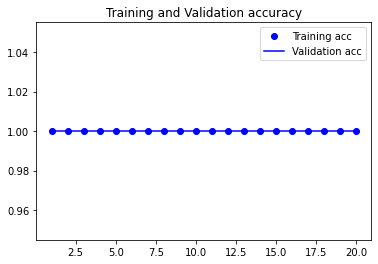

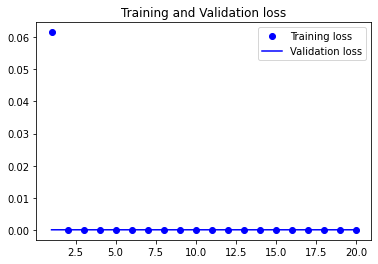

In [16]:
#plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [17]:
#Training the same model without pretraining word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 47ms/step - loss: 0.4833 - acc: 0.9150 - val_loss: 0.1231 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================]

In [18]:
#Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if(fname[-4:] == '.txt'):
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if(label_type == 'neg'):
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [19]:
#Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 16.2883 - acc: 0.5000


[16.288259506225586, 0.5]